## Figure 3

This manuscript generates figure 3 and relavent data of the paper. 

Kexin Dong

May 27, 2024  

In [1]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sksurv.nonparametric import kaplan_meier_estimator # pip install scikit-survival
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## Figure 3c  
Recurrent frequencies of KIT missense mutations in cancer patients according to AACR-GENIE. Mutations are colored by H2M modeling. No flank size limit. Red dashed line = occurred in 5 patients. 

In [33]:
df_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv')
df_input_sub = df_input[(df_input['gene_name_h']=='KIT')]

In [ ]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')
df_kit = df_binded[(df_binded['gene_name_h']=='KIT') & (df_binded['status']==True) & (df_binded['type_h']=='SNP') & (df_binded['Database']=='AACR')]
df_kit = df_kit[df_kit['ID_human'].isin(df_input_sub['ID'])]
df_kit = df_kit.reset_index(drop=True)
# del bf_binded

In [6]:
df_input_sub = df_input_sub.rename(columns = {'ID':'ID_human'})
df_freq = pd.merge(df_input_sub, df_kit, on='ID_human', how = 'left')

In [10]:
color_dict_h2m = dict({0:'tab:orange',
                  1:'tab:green',
                  4:'tab:purple'})

def search_loc(s):
    match = re.search(r'(\d+)', s)
    if match:
        number = match.group(1)
        return int(number)
    else:
        return None

In [11]:
df_merged_all = df_freq
df_merged_all = df_merged_all[df_merged_all['classification_h'] == 'Missense'].reset_index(drop=True)
df_merged_all['loc_h'] = [search_loc(s) for s in  df_merged_all['HGVSp_h']]
# df_merged_all['color'] = [color_dict[x] for x in df_merged_all['am_class']]
df_merged_all['color_h2m'] = [color_dict_h2m[x] for x in df_merged_all['class']]

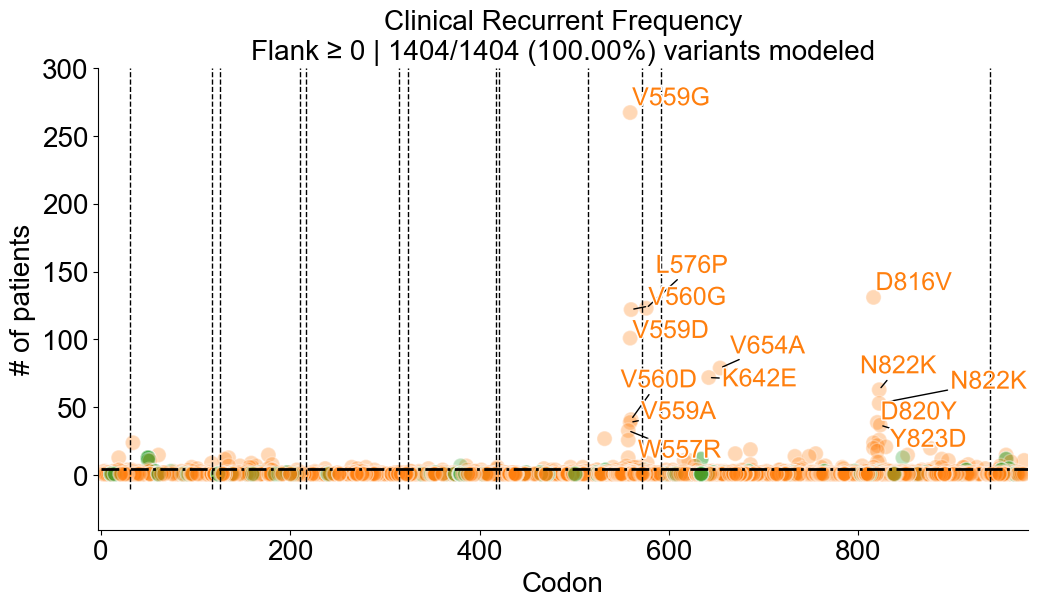

In [32]:
fs = 0
df_merged = df_merged_all[df_merged_all['flank_size'] >= fs].reset_index(drop=True)
gene = 'KIT'
l1 = len(df_merged_all['HGVSp_h'].drop_duplicates())
l2 = len(df_merged[df_merged['status']==True]['HGVSp_h'].drop_duplicates())
percent = 100*l2/l1
bbb1 = df_merged[(df_merged['count'] >= 30) ]

bb2 = bbb1

t = list(bb2['HGVSp_h'])
x = list(bb2['loc_h'])
y = list(bb2['count'])
c= list(bb2['color_h2m'])

fig, ax = plt.subplots(figsize=(12, 6))
# 绘制散点图
g = ax.scatter(data=df_merged, x='loc_h', y='count',  c = 'color_h2m', alpha=.3, s=120, edgecolor='white', linewidths=1)

# 绘制参考线
ax.plot([0, 979], [5, 5], linewidth=2, linestyle='-.', color='black')
# ax.set_ylim(-6, 6)
ax.set_xlim(-3, 979)
ax.set_ylim(-40, 300)
ax.set_ylabel(f"# of patients", fontsize=20)
ax.set_xlabel("Codon", fontsize=20)
ax.set_title(f"Clinical Recurrent Frequency\nFlank ≥ {fs} | {l2}/{l1} ({percent:.2f}%) variants modeled", fontsize=20)
boundaries = [31,117,126,210,217,315,324,417,420,514,571,592,939]
for bound in boundaries:
    ax.plot([bound, bound], [-10, 300], linewidth=1, linestyle='dashed', color='black')

texts = [ax.text(x[i], y[i], t[i], fontsize=18, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/kit_h_freq_{fs}_h2m_colored.pdf', bbox_inches='tight')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

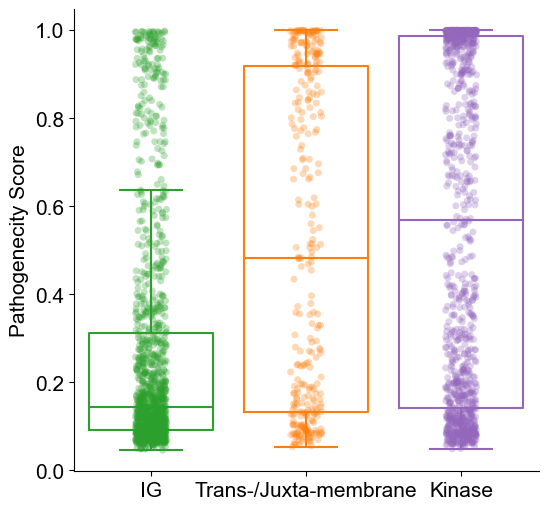

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
g = sns.boxplot(data=df_merged_all, x='region', y='am_pathogenicity', ax=ax, palette=color_dict_region, order=t,showfliers=False, fill = False)
g1 = sns.stripplot(data=df_merged_all, x='region', y='am_pathogenicity', ax=ax, alpha=.3, palette=color_dict_region)#edgecolor='black', linewidth=.5)
#ax.set_xticklabels(['Mis-\nsense', 'Non-\nsense', 'INS', 'DEL', 'Silent'])
#ax.set_xlabel('')
#ax.set_ylabel('LFC D34-Nutlin', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f"Pathogenecity Score", fontsize=15)
ax.set_xlabel("", fontsize=15)
statannot.add_stat_annotation(
    ax,
    data=df_merged_all,
    x='region',
    y='am_pathogenicity',
    #hue=hue,
    box_pairs=[
        ((t[0]), (t[1])),
        ((t[0]), (t[2])),
        ((t[1]), (t[2]))
    ],
    test="t-test_ind",
    text_format="star",
    loc="outside",
)
plt.show()

## Figure 3d  

In [36]:
t = ['IG','Trans-/Juxta-membrane','Kinase']
def get_class_region(x):
    t = ['IG','Trans-/Juxta-membrane','Kinase']
    if x <= 507:
        return t[0]
    elif x<= 589:
        return t[1]
    else:
        return t[2]
df_merged_all['region'] = [get_class_region(x) for x in df_merged_all['loc_h']]
color_dict_region = dict(zip(t, ['tab:green','tab:orange','tab:purple']))
df_merged_all['color_region'] = [color_dict_region[x] for x in df_merged_all['region']]

In [45]:
df_merged_all['status'] = True

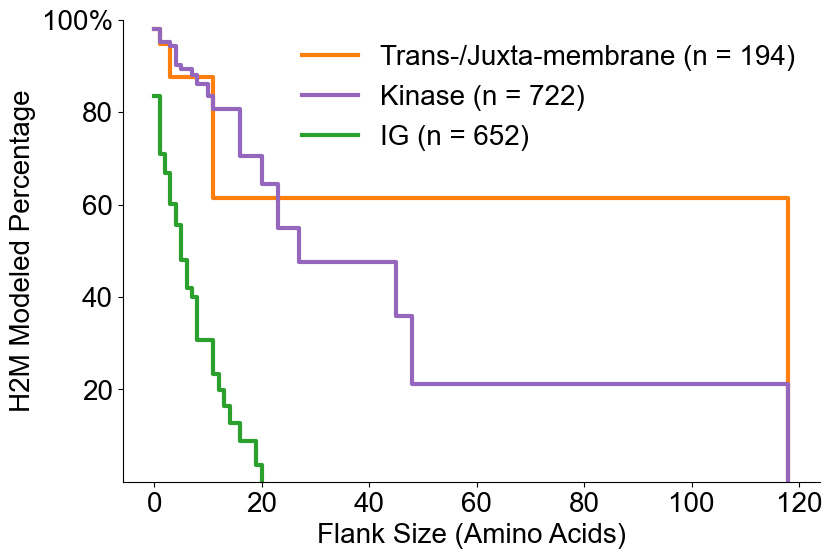

In [68]:
fig, ax = plt.subplots(figsize=(9, 6), ncols=1, nrows=1)
for value in df_merged_all['region'].unique():
    mask = df_merged_all['region'] == value
    color = color_dict_region[value]
    time_cell, survival_prob_cell, conf_int = kaplan_meier_estimator(
        df_merged_all["status"][mask], df_merged_all["flank_size"][mask], conf_type="log-log",
    )
    plt.step(time_cell, survival_prob_cell, where="post", label=f"{value} (n = {mask.sum()})", 
             color = color, linewidth=3)
    # plt.fill_between(time_cell, conf_int[0], conf_int[1], alpha=0.25, step="post")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.yaxis.set_ticks([0.20,0.40,0.60,0.80,1])
ax.yaxis.set_ticklabels(['20','40','60','80','100%'], size=20, fontweight=100)
ax.set_ylabel(f"H2M Modeled Percentage", fontsize=20)
ax.set_xlabel("Flank Size (amino acids)", fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

plt.ylim(0, 1)
plt.xlabel("Flank Size (Amino Acids)")
plt.legend(loc="best",fontsize=20, frameon=False)
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/line.pdf', bbox_inches='tight')
plt.show() # Display the graph

In [41]:
df_merged_all

,gene_name_h_x,tx_id_h_x,start_h_x,end_h_x,ref_seq_h_x,alt_seq_h_x,type_h_x,count,ID_human,gene_name_h_y,...,pe_human,pe_mouse,be_human,be_mouse,expanded,flank_size,loc_h,color_h2m,region,color_region
0,KIT,ENST00000288135.5,55593610,55593610,T,G,SNP,267,AACR-H0000156,KIT,...,True,True,False,False,True,118.0,559,tab:orange,Trans-/Juxta-membrane,tab:orange
1,KIT,ENST00000288135.5,55599321,55599321,A,T,SNP,131,AACR-H0000390,KIT,...,True,True,False,False,True,48.0,816,tab:orange,Kinase,tab:purple
2,KIT,ENST00000288135.5,55593661,55593661,T,C,SNP,123,AACR-H0000420,KIT,...,True,True,True,True,True,118.0,576,tab:orange,Trans-/Juxta-membrane,tab:orange
3,KIT,ENST00000288135.5,55593613,55593613,T,G,SNP,122,AACR-H0000423,KIT,...,True,True,False,False,True,118.0,560,tab:orange,Trans-/Juxta-membrane,tab:orange
4,KIT,ENST00000288135.5,55593610,55593610,T,A,SNP,101,AACR-H0000590,KIT,...,True,True,False,False,True,118.0,559,tab:orange,Trans-/Juxta-membrane,tab:orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,KIT,ENST00000288135.5,55564484,55564484,G,T,SNP,1,AACR-H0717813,KIT,...,False,False,False,False,False,0.0,124,tab:green,IG,tab:green
1564,KIT,ENST00000288135.5,55564491,55564491,A,G,SNP,1,AACR-H0717817,KIT,...,False,False,False,False,False,3.0,127,tab:orange,IG,tab:green
1565,KIT,ENST00000288135.5,55564496,55564496,A,C,SNP,1,AACR-H0717819,KIT,...,False,False,False,False,False,3.0,128,tab:orange,IG,tab:green
1566,KIT,ENST00000288135.5,55564497,55564497,G,A,SNP,1,AACR-H0717820,KIT,...,False,False,False,False,False,3.0,129,tab:orange,IG,tab:green


In [37]:
list_group, list_percentage, list_fs = [],[],[]
for fs in range(119):
    for group in t:
        list_fs.append(fs)
        list_group.append(group)
        df_merged_temp = df_merged_all[df_merged_all['region'] == group].reset_index(drop=True)
        df_merged = df_merged_temp[df_merged_temp['flank_size'] >= fs].reset_index(drop=True)
        l1 = len(df_merged_temp['HGVSp_h'].drop_duplicates())
        l2 = len(df_merged[df_merged['status']==True]['HGVSp_h'].drop_duplicates())
        percent = 100*l2/l1
        list_percentage.append(percent)
df_to_plot = pd.DataFrame(zip(list_group, list_percentage, list_fs),columns=['region', 'percent','fs'])

In [38]:
df_to_plot['color'] = [color_dict_region[x] for x in df_to_plot['region']]

In [ ]:
df_to_plot.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/line_plot.csv',index=False)

In [40]:
df_to_plot

,region,percent,fs,color
0,IG,100.000000,0,tab:green
1,Trans-/Juxta-membrane,100.000000,0,tab:orange
2,Kinase,100.000000,0,tab:purple
3,IG,87.179487,1,tab:green
4,Trans-/Juxta-membrane,97.740113,1,tab:orange
...,...,...,...,...
352,Trans-/Juxta-membrane,63.276836,117,tab:orange
353,Kinase,19.314642,117,tab:purple
354,IG,0.000000,118,tab:green
355,Trans-/Juxta-membrane,63.276836,118,tab:orange


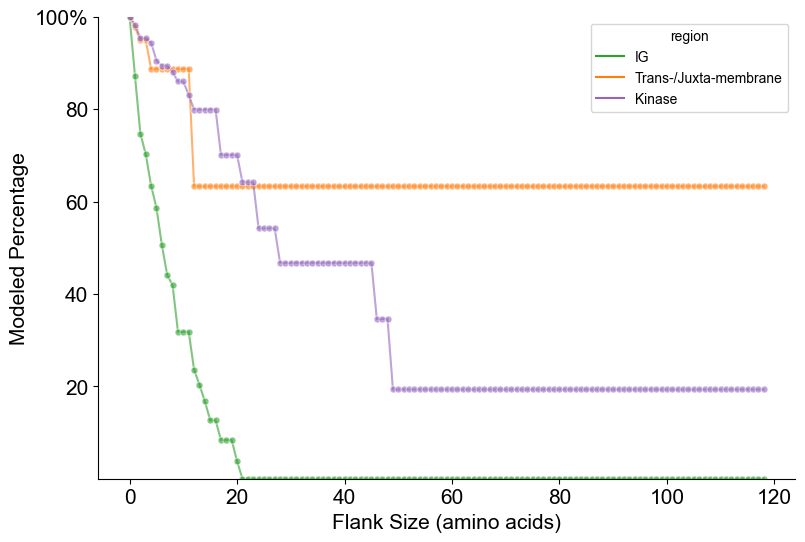

In [39]:
fig, ax = plt.subplots(figsize=(9, 6), ncols=1, nrows=1)
sns.lineplot(x='fs',
             y='percent',
             hue='region', # Create 2 line plots according to labels in 'z'
             data=df_to_plot,
             marker='o', # Style used to mark the join between 2 points
             palette=color_dict_region,
             markersize=5,
             ax = ax,
             alpha=.6
            )
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.yaxis.set_ticks([20,40,60,80,100])
ax.yaxis.set_ticklabels(['20','40','60','80','100%'], size=15, fontweight=100)
ax.set_ylabel(f"Modeled Percentage", fontsize=15)
ax.set_xlabel("Flank Size (amino acids)", fontsize=15)
# plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/flank_size/line.pdf', bbox_inches='tight')
plt.show() # Display the graph

In [ ]:
df_merged_all = pd.merge(df_h2m, df_p53, how='left').dropna(subset='am_class').reset_index(drop=True)

In [ ]:
df_merged_all['color'] = [color_dict[x] for x in df_merged_all['am_class']]

In [ ]:
df_p53 = df_am[df_am['uniprot_id']=='P10721'].reset_index(drop=True)
df_p53 = df_p53.drop('uniprot_id',axis=1)
df_p53.columns=['HGVSp_h','am_pathogenicity','am_class']

#### line plot

In [ ]:
df_merged_all

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,be_mouse,expanded,flank_size,am_pathogenicity,am_class,loc_h,color,color_h2m,region,color_region
0,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593613,55593614,TT,...,False,False,118,0.9715,pathogenic,560,darkred,tab:orange,Trans-/Juxta-membrane,tab:orange
1,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55595518,55595519,AC,...,False,False,27,0.9981,pathogenic,670,darkred,tab:orange,Kinase,tab:purple
2,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55599321,55599322,AC,...,False,False,48,0.9989,pathogenic,816,darkred,tab:orange,Kinase,tab:purple
3,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55603375,55603376,CC,...,False,False,16,0.9325,pathogenic,911,darkred,tab:orange,Kinase,tab:purple
4,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593384,55593385,AG,...,False,False,11,0.1330,benign,514,darkblue,tab:orange,Trans-/Juxta-membrane,tab:orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55594233,55594235,TAC,...,False,False,118,0.9906,pathogenic,646,darkred,tab:orange,Kinase,tab:purple
2720,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55595518,55595520,ACA,...,False,False,27,0.9642,pathogenic,670,darkred,tab:orange,Kinase,tab:purple
2721,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55599320,55599322,GAC,...,False,False,48,0.9993,pathogenic,816,darkred,tab:orange,Kinase,tab:purple
2722,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593609,55593611,GTT,...,False,False,118,0.9890,pathogenic,559,darkred,tab:orange,Trans-/Juxta-membrane,tab:orange


In [ ]:
df_merged_all.to_csv('/Users/kexindong/Documents/GitHub/Output/df_merged_all',index=False)

## 3d 



In [7]:
import bioh2m as h2m
import pandas as pd
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [3]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')
k = df_binded[(df_binded['gene_name_h']=='KDM6A')]
del df_binded

In [ ]:
h2m.model()